In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from data_cleaning import *
import statistics

In [2]:
# Read CSV file 
ev_sales_usa = pd.read_csv("./CSVs/US_PEV_Sales_by_Car_Models.csv")
ev_sales_usa.head()



,Vehicle,Type,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,Chevy Volt,PHEV,"7,671","23,461","23,094","18,805","15,393","24,739","20,349","18,306","4,915","156,733"
1,Nissan Leaf,EV,"9,674","9,819","22,610","30,200","17,269","14,006","11,230","14,715","12,365","141,888"
2,Smart ED,EV,342,139,923,"2,594","1,387",657,544,"1,219",680,"8,485"
3,Mitsubishi I EV,EV,76,588,"1,029",196,115,94,6,-,-,"2,104"
4,BMW Active E,EV,-,673,-,-,-,-,-,-,-,673


In [3]:
ev_sales_usa.set_index('Vehicle', inplace = True)
ev_sales_usa.head()

,Type,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
Vehicle,,,,,,,,,,,
Chevy Volt,PHEV,"7,671","23,461","23,094","18,805","15,393","24,739","20,349","18,306","4,915","156,733"
Nissan Leaf,EV,"9,674","9,819","22,610","30,200","17,269","14,006","11,230","14,715","12,365","141,888"
Smart ED,EV,342,139,923,"2,594","1,387",657,544,"1,219",680,"8,485"
Mitsubishi I EV,EV,76,588,"1,029",196,115,94,6,-,-,"2,104"
BMW Active E,EV,-,673,-,-,-,-,-,-,-,673


In [4]:
# Get all information about DataFrame 
checking_dataframe(ev_sales_usa)

DataFrame Information 

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, Chevy Volt to Kia Niro EV
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Type    55 non-null     object
 1   2011    55 non-null     object
 2   2012    55 non-null     object
 3   2013    55 non-null     object
 4   2014    55 non-null     object
 5   2015    55 non-null     object
 6   2016    55 non-null     object
 7   2017    55 non-null     object
 8   2018    55 non-null     object
 9   2019    55 non-null     object
 10  Total   55 non-null     object
dtypes: object(11)
memory usage: 5.2+ KB
None

Data Types

Type     object
2011     object
2012     object
2013     object
2014     object
2015     object
2016     object
2017     object
2018     object
2019     object
Total    object
dtype: object

Null Values

Type     0
2011     0
2012     0
2013     0
2014     0
2015     0
2016     0
2017     0
2018     0
2019     0
Total    0
dtype: i

In [5]:
# Drop column "total"
ev_sales_usa.drop('Total', axis=1,  inplace=True)
clean_ev_sales_usa = ev_sales_usa
clean_ev_sales_usa.head()

,Type,2011,2012,2013,2014,2015,2016,2017,2018,2019
Vehicle,,,,,,,,,,
Chevy Volt,PHEV,"7,671","23,461","23,094","18,805","15,393","24,739","20,349","18,306","4,915"
Nissan Leaf,EV,"9,674","9,819","22,610","30,200","17,269","14,006","11,230","14,715","12,365"
Smart ED,EV,342,139,923,"2,594","1,387",657,544,"1,219",680
Mitsubishi I EV,EV,76,588,"1,029",196,115,94,6,-,-
BMW Active E,EV,-,673,-,-,-,-,-,-,-


In [6]:
# Cleaning column names
clean_columns(clean_ev_sales_usa)

In [7]:
# Remove whitespace from entire Dataframe
clean_ev_sales_usa.applymap(remove_whitespace)

,Type,2011,2012,2013,2014,2015,2016,2017,2018,2019
Vehicle,,,,,,,,,,
Chevy Volt,PHEV,"7,671","23,461","23,094","18,805","15,393","24,739","20,349","18,306","4,915"
Nissan Leaf,EV,"9,674","9,819","22,610","30,200","17,269","14,006","11,230","14,715","12,365"
Smart ED,EV,342,139,923,"2,594","1,387",657,544,"1,219",680
Mitsubishi I EV,EV,76,588,"1,029",196,115,94,6,-,-
BMW Active E,EV,-,673,-,-,-,-,-,-,-
Prius PHEV,PHEV,-,"12,749","12,088","13,264","4,191","2,474","20,936","27,595","23,630"
Ford Focus EV,EV,-,683,"1,738","1,964","1,582",901,"1,817",560,-
Honda Fit EV,EV,-,93,569,407,2,-,-,-,-
Tesla Model S,EV,-,"2,400","19,400","16,750","26,200","30,200","26,500","25,745","15,090"


In [8]:
# Get all information about DataFrame 
checking_dataframe(clean_ev_sales_usa)

DataFrame Information 

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, Chevy Volt to Kia Niro EV
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Type    55 non-null     object
 1   2011    55 non-null     object
 2   2012    55 non-null     object
 3   2013    55 non-null     object
 4   2014    55 non-null     object
 5   2015    55 non-null     object
 6   2016    55 non-null     object
 7   2017    55 non-null     object
 8   2018    55 non-null     object
 9   2019    55 non-null     object
dtypes: object(10)
memory usage: 4.7+ KB
None

Data Types

Type    object
2011    object
2012    object
2013    object
2014    object
2015    object
2016    object
2017    object
2018    object
2019    object
dtype: object

Null Values

Type    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
dtype: int64


In [9]:
# Iterate through columns of years from 2011 to 2019 to keep only numbers and replace nothing with '0'
for i in range(2011,2020):
    str_val = '{}'.format(i)
    clean_ev_sales_usa[str_val] = clean_ev_sales_usa[str_val].replace(r'[^0-9]+', '' , regex=True)
    clean_ev_sales_usa[str_val] = clean_ev_sales_usa[str_val].replace('' , '0')
clean_ev_sales_usa.head()

,Type,2011,2012,2013,2014,2015,2016,2017,2018,2019
Vehicle,,,,,,,,,,
Chevy Volt,PHEV,7671,23461,23094,18805,15393,24739,20349,18306,4915
Nissan Leaf,EV,9674,9819,22610,30200,17269,14006,11230,14715,12365
Smart ED,EV,342,139,923,2594,1387,657,544,1219,680
Mitsubishi I EV,EV,76,588,1029,196,115,94,6,0,0
BMW Active E,EV,0,673,0,0,0,0,0,0,0


In [10]:
# Convert columns of years to integer type
for i in range(2011,2020):
    str_val = '{}'.format(i)
    clean_ev_sales_usa[str_val] = clean_ev_sales_usa[str_val].astype(str).astype(int)
clean_ev_sales_usa.dtypes  

Type    object
2011     int32
2012     int32
2013     int32
2014     int32
2015     int32
2016     int32
2017     int32
2018     int32
2019     int32
dtype: object

In [11]:
# Add column "total" to DataFrame that sum sales from 2011 to 2019
clean_ev_sales_usa["Total"] = clean_ev_sales_usa.iloc[:,2:10].sum(axis=1)
clean_ev_sales_usa.head()

,Type,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
Vehicle,,,,,,,,,,,
Chevy Volt,PHEV,7671,23461,23094,18805,15393,24739,20349,18306,4915,149062
Nissan Leaf,EV,9674,9819,22610,30200,17269,14006,11230,14715,12365,132214
Smart ED,EV,342,139,923,2594,1387,657,544,1219,680,8143
Mitsubishi I EV,EV,76,588,1029,196,115,94,6,0,0,2028
BMW Active E,EV,0,673,0,0,0,0,0,0,0,673


In [12]:
#write a clean CSV
clean_ev_sales_usa.reset_index(inplace = True)
clean_ev_sales_usa.to_csv("./CSVs/clean_datasets/ev_sales_usa.csv", index=False)

In [13]:
# Read CSV file 
ev_sales_usa_df = pd.read_csv("./CSVs/clean_datasets/ev_sales_usa.csv")
ev_sales_usa_df.head(10)

,Vehicle,Type,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,Chevy Volt,PHEV,7671,23461,23094,18805,15393,24739,20349,18306,4915,149062
1,Nissan Leaf,EV,9674,9819,22610,30200,17269,14006,11230,14715,12365,132214
2,Smart ED,EV,342,139,923,2594,1387,657,544,1219,680,8143
3,Mitsubishi I EV,EV,76,588,1029,196,115,94,6,0,0,2028
4,BMW Active E,EV,0,673,0,0,0,0,0,0,0,673
5,Prius PHEV,PHEV,0,12749,12088,13264,4191,2474,20936,27595,23630,116927
6,Ford Focus EV,EV,0,683,1738,1964,1582,901,1817,560,0,9245
7,Honda Fit EV,EV,0,93,569,407,2,0,0,0,0,1071
8,Tesla Model S,EV,0,2400,19400,16750,26200,30200,26500,25745,15090,162285
9,Toyota RAV4 EV,EV,0,192,1005,1184,18,0,0,0,0,2399


In [14]:
# Retrieve maximum sold vehicles wtih sale values for each year

year = []
max_sale = []
max_vehicle = []
percntg_of_total_sale = []

cols = ev_sales_usa_df.columns
for i in range(2,len(cols)-1):
    year_data = ev_sales_usa_df[cols[i]].name
    year.append(year_data)
    max_sale_data = ev_sales_usa_df[cols[i]].max()
    max_sale.append(max_sale_data)
    vehicle_name = ev_sales_usa_df['Vehicle'].loc[ev_sales_usa_df[cols[i]] == max_sale_data].values.astype('str')
    max_vehicle_data = ''.join(map(str, vehicle_name))
    max_vehicle.append(max_vehicle_data)
    total_sales_year = ev_sales_usa[cols[i]].sum()
    percntg_of_total_sale_data = round((max_sale_data/total_sales_year)*100,2);
    percntg_of_total_sale.append(percntg_of_total_sale_data)
      
# assign data of lists.  
data = {'Year': year, 'Vehicle': max_vehicle, 'Max_Sale':max_sale, '%_of_Total_Sale':percntg_of_total_sale}  
  
# Create DataFrame  
max_sales_ev_usa_yearwise = pd.DataFrame(data)  
print(max_sales_ev_usa_yearwise.to_string(index = False))

Year       Vehicle  Max_Sale  %_of_Total_Sale
2011   Nissan Leaf      9674            54.46
2012    Chevy Volt     23461            44.12
2013    Chevy Volt     23094            23.78
2014   Nissan Leaf     30200            25.40
2015 Tesla Model S     26200            22.98
2016 Tesla Model S     30200            18.92
2017 Tesla Model S     26500            13.55
2018 Tesla Model 3    139782            38.69
2019 Tesla Model 3    154840            47.40


In [15]:
# Statistics of EV sales for years(2011-2019)
def get_stats(col):   
    mean = ev_sales_usa_df[year].mean()
    std = ev_sales_usa_df[year].std()
    cov = std / mean
    return mean, std, cov

avg_sales = []
std_dev_sales = []
cov_sales = []

cols = ev_sales_usa_df.columns
for i in range(2,len(cols)-1):
    stats = get_stats(ev_sales_usa_df[cols[i]].name)
    avg_sales = stats[0]
    std_dev_sales =stats[1]
    cov_sales = stats[2]

stats_data = {'Avg_Sales':round(avg_sales,2) ,'Std_Dev':round(std_dev_sales,2) ,'Coefficiet of Variation':round(cov_sales,2)} 
stats_ev_sales_usa = pd.DataFrame(stats_data)
print(stats_ev_sales_usa.to_string())
stats_ev_sales_usa

      Avg_Sales   Std_Dev  Coefficiet of Variation
2011     322.96   1648.89                     5.11
2012     966.75   3777.84                     3.91
2013    1765.49   5254.23                     2.98
2014    2161.49   5654.33                     2.62
2015    2073.15   4965.76                     2.40
2016    2902.11   6298.62                     2.17
2017    3556.02   6568.85                     1.85
2018    6569.36  19634.56                     2.99
2019    5938.98  21091.30                     3.55


,Avg_Sales,Std_Dev,Coefficiet of Variation
2011,322.96,1648.89,5.11
2012,966.75,3777.84,3.91
2013,1765.49,5254.23,2.98
2014,2161.49,5654.33,2.62
2015,2073.15,4965.76,2.40
2016,2902.11,6298.62,2.17
2017,3556.02,6568.85,1.85
2018,6569.36,19634.56,2.99
2019,5938.98,21091.30,3.55


2121.969479986563


Text(0.5, 1.0, 'Standard Deviation of Avg EV Sales')

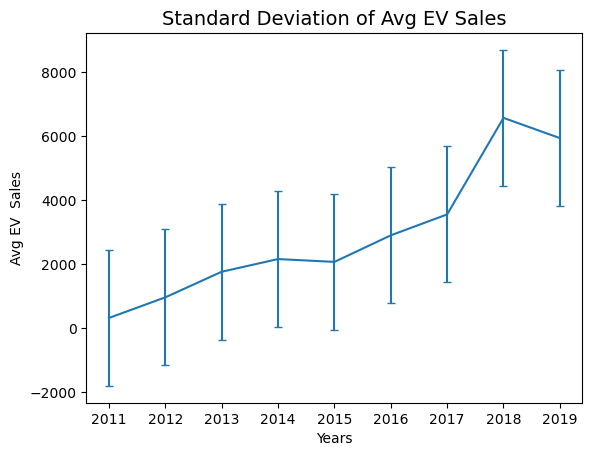

In [16]:
# Ploting error bar to show standard deviation.
x_axis = stats_ev_sales_usa.index
y_axis = stats_ev_sales_usa['Avg_Sales']
stdev = statistics.stdev(y_axis)
print(stdev)
plt.errorbar(x_axis,y_axis,yerr=stdev, capsize=3)
plt.xlabel('Years')
plt.ylabel('Avg EV  Sales')
plt.title('Standard Deviation of Avg EV Sales', fontsize=14)

In [17]:
# Statitics of max sales 
max_sales_ev_usa_yearwise.describe()

,Max_Sale,%_of_Total_Sale
count,9.000000,9.000000
mean,51550.111111,32.144444
std,54758.349999,14.304947
min,9674.000000,13.550000
25%,23461.000000,22.980000
50%,26500.000000,25.400000
75%,30200.000000,44.120000
max,154840.000000,54.460000


In [18]:
# Write clean CSV file
max_sales_ev_usa_yearwise.to_csv("./CSVs/clean_datasets/max_sales_ev_usa_yearwise.csv", index=False)